# Isostatic Truss

The script `Hw2P1.py` was written in Python to define the model geometry in terms of a python class named `mdl`. Methods were then written to act on this class and carry out the requested procedures.

In [1]:
import ema as em #V0.1
import numpy as np
import sympy as sp
import numpy.linalg as LA
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
exec(open("scripts//Hw2P1.py").read())
nf = mdl.nf

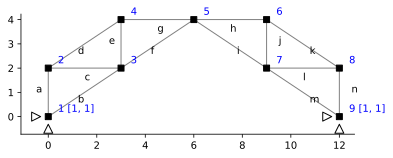

In [3]:
fig, ax = plt.subplots(1,1)
em.plotting.plot_structure(mdl, ax)

## Systematically number all DOFs

In [4]:
for i,node in enumerate(mdl.nodes):
    print("node {} DOFs : {}".format(node.tag, mdl.DOF[i]))

node 1 DOFs : [15, 16]
node 2 DOFs : [1, 2]
node 3 DOFs : [3, 4]
node 4 DOFs : [5, 6]
node 5 DOFs : [7, 8]
node 6 DOFs : [9, 10]
node 7 DOFs : [11, 12]
node 8 DOFs : [13, 14]
node 9 DOFs : [17, 18]


## Construct equilibrium equation, $P_f = B_f Q$

In [9]:
B = em.B_matrix(mdl)
P = em.P_vector(B)
P

,$P_{{}}$
$1$,0.0
$2$,0.0
$3$,0.0
$4$,0.0
$5$,0.0
$6$,-12.0
$7$,0.0
$8$,0.0
$9$,0.0
$10$,0.0


In [6]:
B.f

,$a_1$,$b_1$,$c_1$,$d_1$,$e_1$,$f_1$,$g_1$,$h_1$,$i_1$,$j_1$,$k_1$,$l_1$,$m_1$,$n_1$
$1$,0.0,0.00000,-1.0,-0.83205,0.0,0.00000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
$2$,1.0,0.00000,-0.0,-0.55470,0.0,0.00000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
$3$,0.0,0.83205,1.0,0.00000,-0.0,-0.83205,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
$4$,0.0,0.55470,0.0,0.00000,-1.0,-0.55470,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
$5$,0.0,0.00000,0.0,0.83205,0.0,0.00000,-1.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
$6$,0.0,0.00000,0.0,0.55470,1.0,0.00000,-0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
$7$,0.0,0.00000,0.0,0.00000,0.0,0.83205,1.0,-1.0,-0.83205,0.0,0.00000,0.0,0.00000,0.0
$8$,0.0,0.00000,0.0,0.00000,0.0,0.55470,0.0,-0.0,0.55470,0.0,0.00000,0.0,0.00000,0.0
$9$,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,1.0,0.00000,-0.0,-0.83205,0.0,0.00000,0.0
$10$,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,1.0,0.55470,0.0,0.00000,0.0


## Solve for basic element force vector, $Q$

In [7]:
B1 = B.bari
B1

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$,$9$,$10$,$11$,$12$,$13$,$14$
$a_1$,-0.333333,1.0,-0.333333,0.500000,0.000000,0.500000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0
$b_1$,0.901388,0.0,0.901388,0.450694,0.600925,0.450694,0.600925,0.901388,0.600925,0.450694,0.300463,0.450694,0.300463,0.0
$c_1$,-0.500000,-0.0,0.500000,-0.750000,-0.000000,-0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.0
$d_1$,-0.600925,0.0,-0.600925,0.901388,0.000000,0.901388,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0
$e_1$,0.333333,-0.0,0.333333,-0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.0
$f_1$,0.300463,0.0,0.300463,-0.450694,0.600925,-0.450694,0.600925,0.901388,0.600925,0.450694,0.300463,0.450694,0.300463,0.0
$g_1$,-0.500000,0.0,-0.500000,0.750000,-1.000000,0.750000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0
$h_1$,-0.000000,0.0,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1.000000,0.750000,0.500000,0.750000,0.500000,0.0
$i_1$,-0.300463,0.0,-0.300463,0.450694,-0.600925,0.450694,-0.600925,0.901388,-0.600925,-0.450694,-0.300463,-0.450694,-0.300463,0.0
$j_1$,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,-0.333333,-0.500000,-0.333333,0.0


In [10]:
Q = B1@P.f
Q

,$Q_{{ffff}}$
$a_1$,-6.000000
$b_1$,-10.816654
$c_1$,9.000000
$d_1$,-10.816654
$e_1$,-6.000000
$f_1$,-0.000000
$g_1$,-9.000000
$h_1$,-9.000000
$i_1$,0.000000
$j_1$,6.000000


## Find support reactions, $R$

In [11]:
R = B.d@Q
R

,$P_{{ffff}}$
$15$,9.0
$16$,12.0
$17$,9.0
$18$,-0.0


## Check global equilibrium

In [14]:
# sum horizontal forces:
R[0]+R[2] + P.get('13')

0.0

In [15]:
# sum vertical forces:
R[1]+R[3] + P.get('6')

0.0